In [1]:
import pandas as pd
import numpy as np
import ast
import wfdb
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
def load_signal_data_raw(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

In [3]:
def aggregate_diagnostic_class(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return tmp

In [4]:
def aggregate_diagnostic_subclass(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_subclass)
    return tmp

In [5]:
path="Data/"
sampling_rate=100

In [6]:
data_raw = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
data_raw.scp_codes = data_raw.scp_codes.apply(lambda x: ast.literal_eval(x))

In [7]:
data_raw

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21834,20703.0,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr


In [8]:
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]

In [9]:
agg_df

,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7
IMI,inferior myocardial infarction,1.0,NaN,NaN,MI,IMI,Myocardial Infarction,inferior myocardial infarction,161.0,NaN,NaN,NaN
ASMI,anteroseptal myocardial infarction,1.0,NaN,NaN,MI,AMI,Myocardial Infarction,anteroseptal myocardial infarction,165.0,NaN,NaN,NaN
LVH,left ventricular hypertrophy,1.0,NaN,NaN,HYP,LVH,Ventricular Hypertrophy,left ventricular hypertrophy,142.0,NaN,C71076,NaN
LAFB,left anterior fascicular block,1.0,NaN,NaN,CD,LAFB/LPFB,Intraventricular and intra-atrial Conduction d...,left anterior fascicular block,101.0,MDC_ECG_BEAT_BLK_ANT_L_HEMI,C62267,D3-33140
ISC_,non-specific ischemic,1.0,NaN,NaN,STTC,ISC_,Basic roots for coding ST-T changes and abnorm...,ischemic ST-T changes,226.0,NaN,NaN,NaN


In [10]:
data_raw = data_raw.assign(scp_codes_filtered = 0)

In [11]:
# отсеиваем случаи, когда вероятность меньше 100%

for i in range(data_raw.shape[0]):
    buf = {}
    for key,value in data_raw['scp_codes'].iat[i].items():
        if value == 100.0:
            buf[key] = value
    data_raw['scp_codes_filtered'].iat[i] = buf

In [12]:
data_raw[['scp_codes', 'scp_codes_filtered']]

,scp_codes,scp_codes_filtered
ecg_id,,
1,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",{'NORM': 100.0}
2,"{'NORM': 80.0, 'SBRAD': 0.0}",{}
3,"{'NORM': 100.0, 'SR': 0.0}",{'NORM': 100.0}
4,"{'NORM': 100.0, 'SR': 0.0}",{'NORM': 100.0}
5,"{'NORM': 100.0, 'SR': 0.0}",{'NORM': 100.0}
...,...,...
21833,"{'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST...","{'NDT': 100.0, 'PVC': 100.0}"
21834,"{'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}",{'NORM': 100.0}
21835,"{'ISCAS': 50.0, 'SR': 0.0}",{}


In [13]:
counter=0
index=1
while counter<data_raw.shape[0]:
    if data_raw['scp_codes_filtered'].iat[counter]=={}:
        data_raw=data_raw.drop(labels=index,axis=0)        
    else:
        counter=counter+1
    index=index+1

In [14]:
data_raw[['scp_codes', 'scp_codes_filtered']]

,scp_codes,scp_codes_filtered
ecg_id,,
1,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",{'NORM': 100.0}
3,"{'NORM': 100.0, 'SR': 0.0}",{'NORM': 100.0}
4,"{'NORM': 100.0, 'SR': 0.0}",{'NORM': 100.0}
5,"{'NORM': 100.0, 'SR': 0.0}",{'NORM': 100.0}
6,"{'NORM': 100.0, 'SR': 0.0}",{'NORM': 100.0}
...,...,...
21832,"{'LAFB': 100.0, 'IVCD': 100.0, 'SR': 0.0}","{'LAFB': 100.0, 'IVCD': 100.0}"
21833,"{'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST...","{'NDT': 100.0, 'PVC': 100.0}"
21834,"{'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}",{'NORM': 100.0}


In [15]:
data_raw = data_raw.reset_index()
data_raw = data_raw.rename(index=lambda x: x + 1)

In [16]:
# подтягиваем классы и подклассы

data_raw['diagnostic_class'] = data_raw.scp_codes_filtered.apply(aggregate_diagnostic_class)
data_raw['diagnostic_subclass'] = data_raw.scp_codes_filtered.apply(aggregate_diagnostic_subclass)

In [17]:
data_raw

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,scp_codes_filtered,diagnostic_class,diagnostic_subclass
1,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,{'NORM': 100.0},[NORM],[NORM]
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,{'NORM': 100.0},[NORM],[NORM]
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,{'NORM': 100.0},[NORM],[NORM]
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,{'NORM': 100.0},[NORM],[NORM]
5,6,19005.0,18.0,1,NaN,58.0,2.0,0.0,CS-12 E,1984-11-28 13:32:13,...,NaN,NaN,NaN,NaN,4,records100/00000/00006_lr,records500/00000/00006_hr,{'NORM': 100.0},[NORM],[NORM]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17899,21832,7954.0,63.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-05-30 14:14:25,...,NaN,NaN,NaN,NaN,7,records100/21000/21832_lr,records500/21000/21832_hr,"{'LAFB': 100.0, 'IVCD': 100.0}","[CD, CD]","[LAFB/LPFB, IVCD]"
17900,21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,...,NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr,"{'NDT': 100.0, 'PVC': 100.0}",[STTC],[STTC]
17901,21834,20703.0,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,...,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr,{'NORM': 100.0},[NORM],[NORM]
17902,21836,8873.0,64.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-09 18:21:49,...,NaN,NaN,SVES,NaN,8,records100/21000/21836_lr,records500/21000/21836_hr,{'NORM': 100.0},[NORM],[NORM]


In [18]:
# удаляем пустые классы

counter=0
index=1
while counter<data_raw.shape[0]:
    if data_raw['diagnostic_class'].iat[counter]==[]:
        data_raw=data_raw.drop(labels=index,axis=0)        
    else:
        counter=counter+1
    index=index+1

In [19]:
data_raw = data_raw.reset_index(drop = True)
data_raw = data_raw.rename(index=lambda x: x + 1)

In [20]:
data_raw

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,scp_codes_filtered,diagnostic_class,diagnostic_subclass
1,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,{'NORM': 100.0},[NORM],[NORM]
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,{'NORM': 100.0},[NORM],[NORM]
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,{'NORM': 100.0},[NORM],[NORM]
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,{'NORM': 100.0},[NORM],[NORM]
5,6,19005.0,18.0,1,NaN,58.0,2.0,0.0,CS-12 E,1984-11-28 13:32:13,...,NaN,NaN,NaN,NaN,4,records100/00000/00006_lr,records500/00000/00006_hr,{'NORM': 100.0},[NORM],[NORM]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17255,21832,7954.0,63.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-05-30 14:14:25,...,NaN,NaN,NaN,NaN,7,records100/21000/21832_lr,records500/21000/21832_hr,"{'LAFB': 100.0, 'IVCD': 100.0}","[CD, CD]","[LAFB/LPFB, IVCD]"
17256,21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,...,NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr,"{'NDT': 100.0, 'PVC': 100.0}",[STTC],[STTC]
17257,21834,20703.0,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,...,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr,{'NORM': 100.0},[NORM],[NORM]
17258,21836,8873.0,64.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-09 18:21:49,...,NaN,NaN,SVES,NaN,8,records100/21000/21836_lr,records500/21000/21836_hr,{'NORM': 100.0},[NORM],[NORM]


In [21]:
data_raw = data_raw.assign(diagnostic_class_filtered = 0)
data_raw = data_raw.assign(diagnostic_subclass_filtered = 0)

In [22]:
for i in range(data_raw.shape[0]):
    data_raw['diagnostic_class_filtered'].iat[i] = data_raw['diagnostic_class'].iat[i][0]
    data_raw['diagnostic_subclass_filtered'].iat[i] = data_raw['diagnostic_subclass'].iat[i][0]

In [23]:
data_raw['diagnostic_class_filtered'].value_counts()

NORM    7185
CD      3239
STTC    3065
MI      2941
HYP      829
Name: diagnostic_class_filtered, dtype: int64

In [24]:
data_raw['diagnostic_subclass_filtered'].value_counts()

NORM         7185
STTC         1714
AMI          1636
IMI          1273
LAFB/LPFB     881
IRBBB         800
LVH           733
CLBBB         527
NST_          478
ISCA          429
CRBBB         385
IVCD          327
ISC_          297
_AVB          208
ISCI          147
WPW            67
LAO/LAE        50
ILBBB          44
RAO/RAE        33
LMI            28
RVH             7
SEHYP           6
PMI             4
Name: diagnostic_subclass_filtered, dtype: int64

In [25]:
rows_to_drop = data_raw[(data_raw['diagnostic_subclass_filtered'] == 'SEHYP') | (data_raw['diagnostic_subclass_filtered'] == 'PMI') | (data_raw['diagnostic_subclass_filtered'] == 'RVH') ].index
data= data_raw.drop(rows_to_drop)

In [26]:
data

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,scp_codes_filtered,diagnostic_class,diagnostic_subclass,diagnostic_class_filtered,diagnostic_subclass_filtered
1,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,{'NORM': 100.0},[NORM],[NORM],NORM,NORM
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,{'NORM': 100.0},[NORM],[NORM],NORM,NORM
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,{'NORM': 100.0},[NORM],[NORM],NORM,NORM
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,{'NORM': 100.0},[NORM],[NORM],NORM,NORM
5,6,19005.0,18.0,1,NaN,58.0,2.0,0.0,CS-12 E,1984-11-28 13:32:13,...,NaN,NaN,4,records100/00000/00006_lr,records500/00000/00006_hr,{'NORM': 100.0},[NORM],[NORM],NORM,NORM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17255,21832,7954.0,63.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-05-30 14:14:25,...,NaN,NaN,7,records100/21000/21832_lr,records500/21000/21832_hr,"{'LAFB': 100.0, 'IVCD': 100.0}","[CD, CD]","[LAFB/LPFB, IVCD]",CD,LAFB/LPFB
17256,21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,...,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr,"{'NDT': 100.0, 'PVC': 100.0}",[STTC],[STTC],STTC,STTC
17257,21834,20703.0,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,...,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr,{'NORM': 100.0},[NORM],[NORM],NORM,NORM
17258,21836,8873.0,64.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-09 18:21:49,...,SVES,NaN,8,records100/21000/21836_lr,records500/21000/21836_hr,{'NORM': 100.0},[NORM],[NORM],NORM,NORM


In [27]:
data['diagnostic_class_filtered'].value_counts()

NORM    7185
CD      3239
STTC    3065
MI      2937
HYP      816
Name: diagnostic_class_filtered, dtype: int64

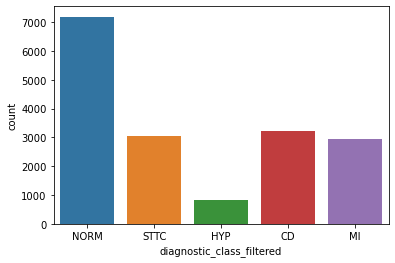

In [28]:
sns.countplot(x='diagnostic_class_filtered', data=data)
pass

In [29]:
data['diagnostic_subclass_filtered'].value_counts()

NORM         7185
STTC         1714
AMI          1636
IMI          1273
LAFB/LPFB     881
IRBBB         800
LVH           733
CLBBB         527
NST_          478
ISCA          429
CRBBB         385
IVCD          327
ISC_          297
_AVB          208
ISCI          147
WPW            67
LAO/LAE        50
ILBBB          44
RAO/RAE        33
LMI            28
Name: diagnostic_subclass_filtered, dtype: int64

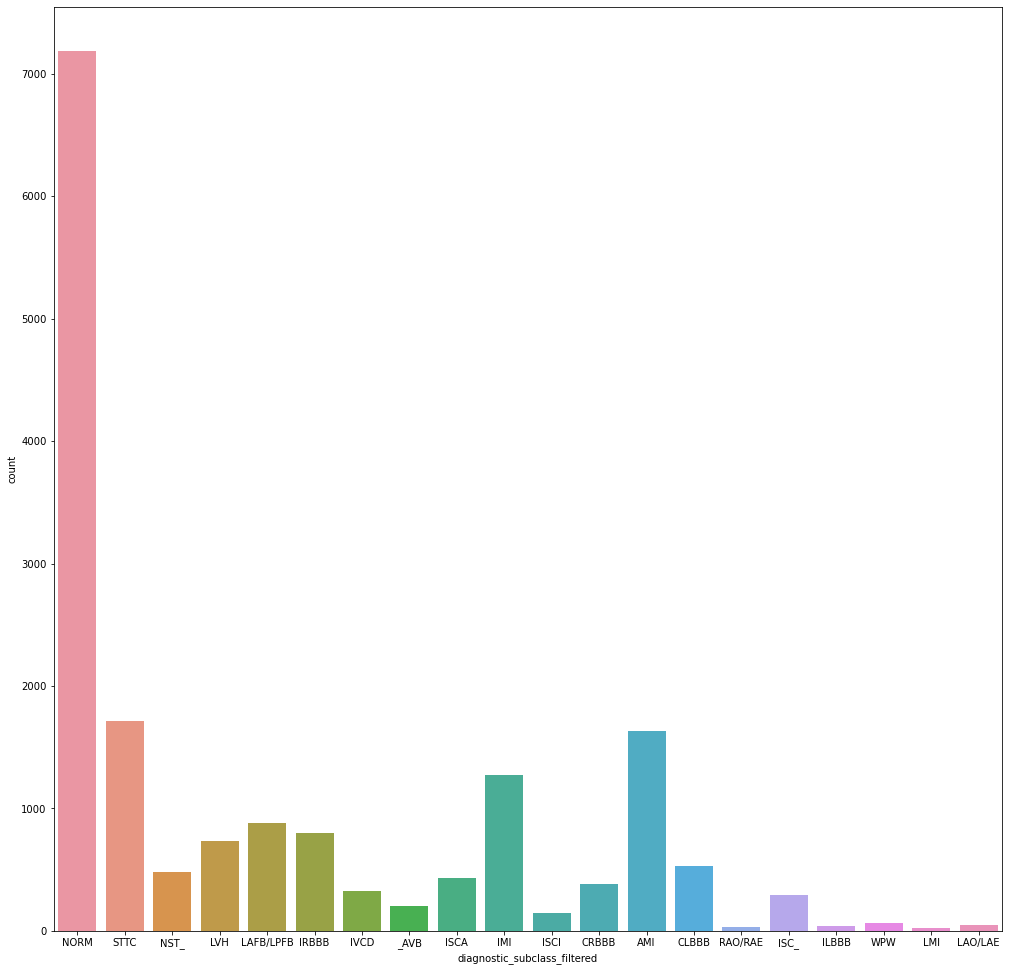

In [30]:
plt.rcParams['figure.figsize'] = (17.0, 17.0)
sns.countplot(x='diagnostic_subclass_filtered', data=data)
pass

In [31]:
data = data.assign(superclass = 0)
data = data.assign(subclass = 0)
data = data.assign(binary_class = 0)

In [33]:
superclass_dict = {'MI': 0, 'CD': 1, 'HYP': 2, 'STTC': 3, 'NORM': 4}

In [35]:
subclass_dict = {'CRBBB': 0,
 'ISC_': 1,
 'RAO/RAE': 2,
 'ILBBB': 3,
 '_AVB': 4,
 'ISCA': 5,
 'NORM': 6,
 'AMI': 7,
 'LVH': 8,
 'ISCI': 9,
 'STTC': 10,
 'IMI': 11,
 'LMI': 12,
 'IVCD': 13,
 'LAFB/LPFB': 14,
 'CLBBB': 15,
 'LAO/LAE': 16,
 'NST_': 17,
 'IRBBB': 18,
 'WPW': 19}

In [36]:
for i in range(data.shape[0]):
    data['superclass'].iat[i] = superclass_dict[data['diagnostic_class_filtered'].iat[i]]
    data['subclass'].iat[i] = subclass_dict[data['diagnostic_subclass_filtered'].iat[i]]
    data['binary_class'].iat[i] = int(data['diagnostic_class_filtered'].iat[i] == "NORM")

In [37]:
data.head(10)

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,filename_lr,filename_hr,scp_codes_filtered,diagnostic_class,diagnostic_subclass,diagnostic_class_filtered,diagnostic_subclass_filtered,superclass,subclass,binary_class
1,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,records100/00000/00001_lr,records500/00000/00001_hr,{'NORM': 100.0},[NORM],[NORM],NORM,NORM,4,6,1
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,records100/00000/00003_lr,records500/00000/00003_hr,{'NORM': 100.0},[NORM],[NORM],NORM,NORM,4,6,1
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,records100/00000/00004_lr,records500/00000/00004_hr,{'NORM': 100.0},[NORM],[NORM],NORM,NORM,4,6,1
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,records100/00000/00005_lr,records500/00000/00005_hr,{'NORM': 100.0},[NORM],[NORM],NORM,NORM,4,6,1
5,6,19005.0,18.0,1,NaN,58.0,2.0,0.0,CS-12 E,1984-11-28 13:32:13,...,records100/00000/00006_lr,records500/00000/00006_hr,{'NORM': 100.0},[NORM],[NORM],NORM,NORM,4,6,1
6,7,16193.0,54.0,0,NaN,83.0,2.0,0.0,CS-12 E,1984-11-28 13:32:22,...,records100/00000/00007_lr,records500/00000/00007_hr,{'NORM': 100.0},[NORM],[NORM],NORM,NORM,4,6,1
7,9,18792.0,55.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-12-08 09:44:43,...,records100/00000/00009_lr,records500/00000/00009_hr,{'NORM': 100.0},[NORM],[NORM],NORM,NORM,4,6,1
8,10,9456.0,22.0,1,NaN,56.0,2.0,0.0,CS-12 E,1984-12-12 14:12:46,...,records100/00000/00010_lr,records500/00000/00010_hr,{'NORM': 100.0},[NORM],[NORM],NORM,NORM,4,6,1
9,13,19953.0,58.0,1,NaN,54.0,2.0,0.0,CS-12 E,1985-01-05 12:13:05,...,records100/00000/00013_lr,records500/00000/00013_hr,{'NORM': 100.0},[NORM],[NORM],NORM,NORM,4,6,1
10,14,12925.0,19.0,1,NaN,58.0,2.0,0.0,CS-12 E,1985-01-10 11:45:19,...,records100/00000/00014_lr,records500/00000/00014_hr,{'NORM': 100.0},[NORM],[NORM],NORM,NORM,4,6,1


In [38]:
data.tail(10)

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,filename_lr,filename_hr,scp_codes_filtered,diagnostic_class,diagnostic_subclass,diagnostic_class_filtered,diagnostic_subclass_filtered,superclass,subclass,binary_class
17250,21825,11197.0,59.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-05-12 11:07:26,...,records100/21000/21825_lr,records500/21000/21825_hr,{'NORM': 100.0},[NORM],[NORM],NORM,NORM,4,6,1
17251,21827,13862.0,79.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-20 16:30:53,...,records100/21000/21827_lr,records500/21000/21827_hr,{'IMI': 100.0},[MI],[IMI],MI,IMI,0,11,0
17252,21828,13862.0,79.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-21 09:33:30,...,records100/21000/21828_lr,records500/21000/21828_hr,"{'ISCLA': 100.0, 'PVC': 100.0}",[STTC],[ISCA],STTC,ISCA,3,5,0
17253,21829,14508.0,69.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-22 19:05:34,...,records100/21000/21829_lr,records500/21000/21829_hr,{'IRBBB': 100.0},[CD],[IRBBB],CD,IRBBB,1,18,0
17254,21831,11905.0,55.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-28 12:49:25,...,records100/21000/21831_lr,records500/21000/21831_hr,{'NORM': 100.0},[NORM],[NORM],NORM,NORM,4,6,1
17255,21832,7954.0,63.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-05-30 14:14:25,...,records100/21000/21832_lr,records500/21000/21832_hr,"{'LAFB': 100.0, 'IVCD': 100.0}","[CD, CD]","[LAFB/LPFB, IVCD]",CD,LAFB/LPFB,1,14,0
17256,21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,...,records100/21000/21833_lr,records500/21000/21833_hr,"{'NDT': 100.0, 'PVC': 100.0}",[STTC],[STTC],STTC,STTC,3,10,0
17257,21834,20703.0,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,...,records100/21000/21834_lr,records500/21000/21834_hr,{'NORM': 100.0},[NORM],[NORM],NORM,NORM,4,6,1
17258,21836,8873.0,64.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-09 18:21:49,...,records100/21000/21836_lr,records500/21000/21836_hr,{'NORM': 100.0},[NORM],[NORM],NORM,NORM,4,6,1
17259,21837,11744.0,68.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-11 16:43:01,...,records100/21000/21837_lr,records500/21000/21837_hr,{'NORM': 100.0},[NORM],[NORM],NORM,NORM,4,6,1


In [39]:
del data_raw

In [40]:
data['binary_class'].value_counts()

0    10057
1     7185
Name: binary_class, dtype: int64

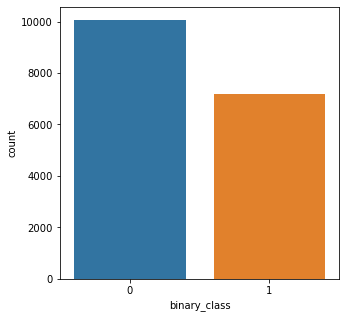

In [41]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sns.countplot(x='binary_class', data=data)
pass

In [40]:
signal_data_raw = load_signal_data_raw(data, sampling_rate, path)

In [41]:
signal_data_raw.shape

(17242, 1000, 12)

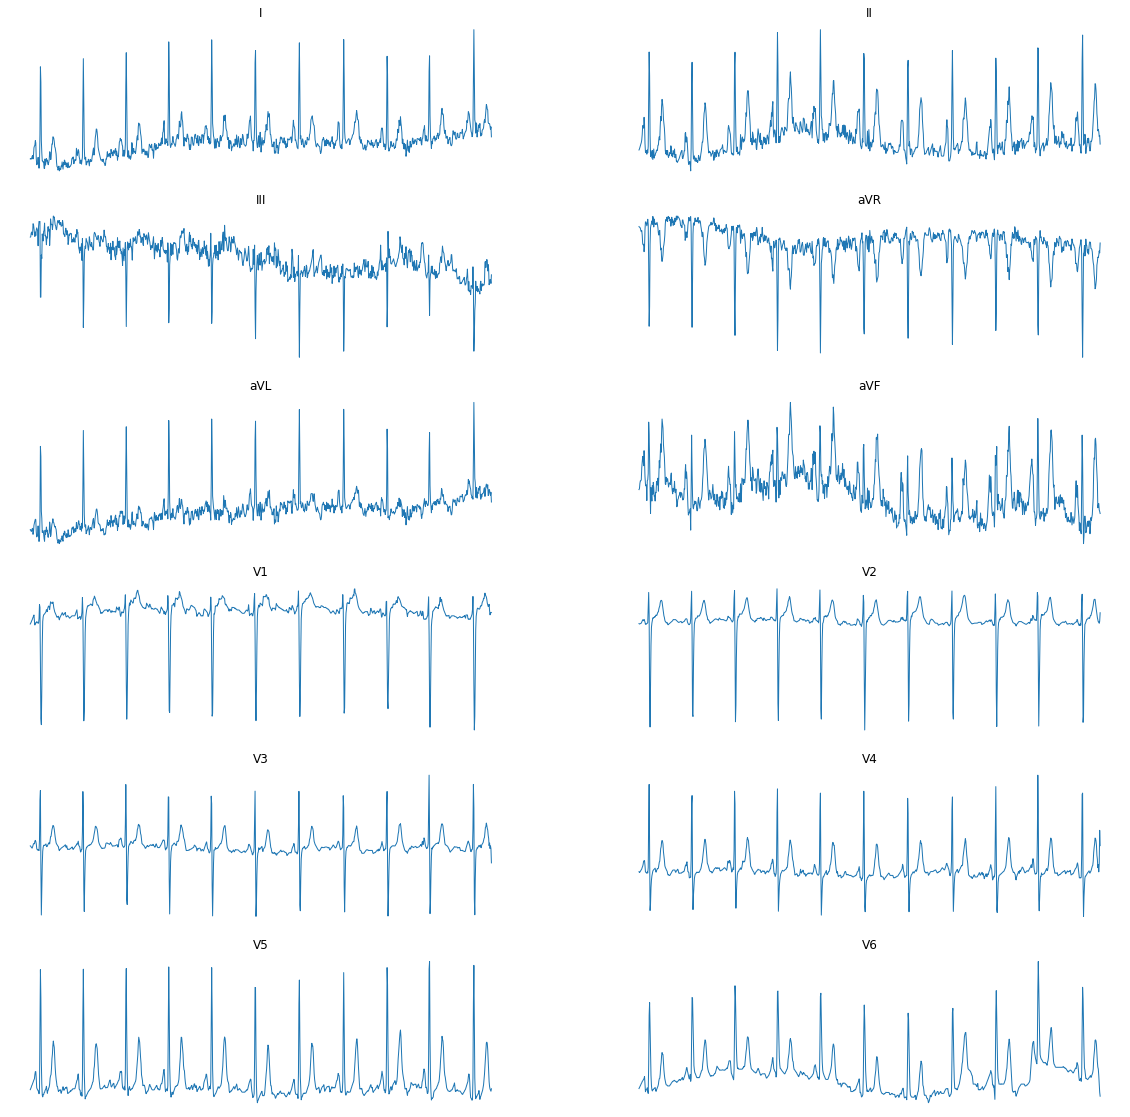

In [42]:
# NORM
ecg = signal_data_raw[0]
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = (0.1,0.1)
plt.figure()
for index in range(12):
    plt.subplot(6,2,index+1)
    plt.plot(ecg[:,index], linewidth=1)
    
    plt.gca()
    plt.title(titles[index])
    plt.axis('off')
plt.show()

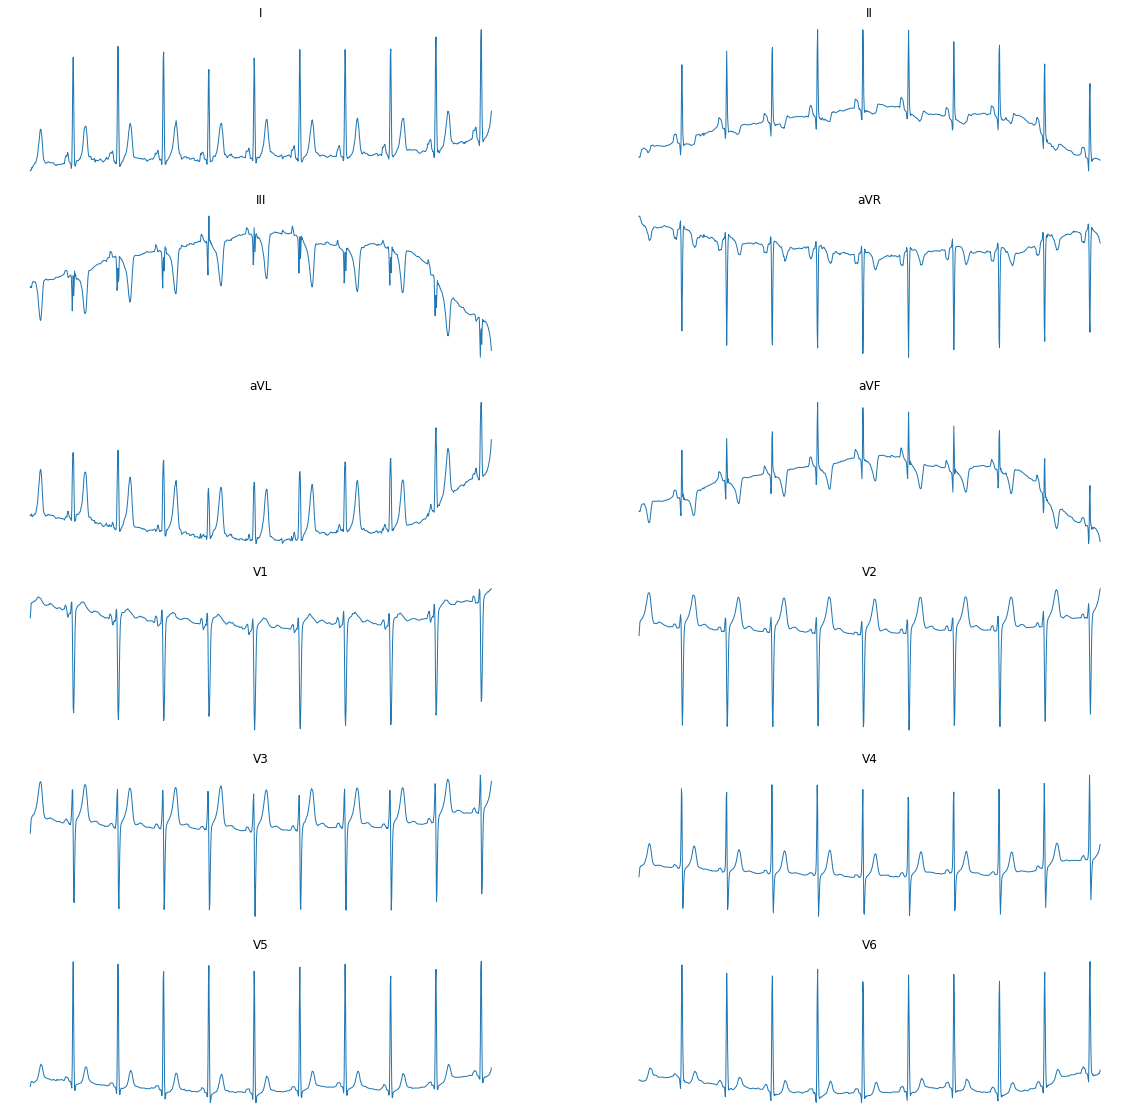

In [43]:
# MI
ecg = signal_data_raw[108]
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = (0.1,0.1)
plt.figure()
for index in range(12):
    plt.subplot(6,2,index+1)
    plt.plot(ecg[:,index], linewidth=1)
    
    plt.gca()
    plt.title(titles[index])
    plt.axis('off')
plt.show()

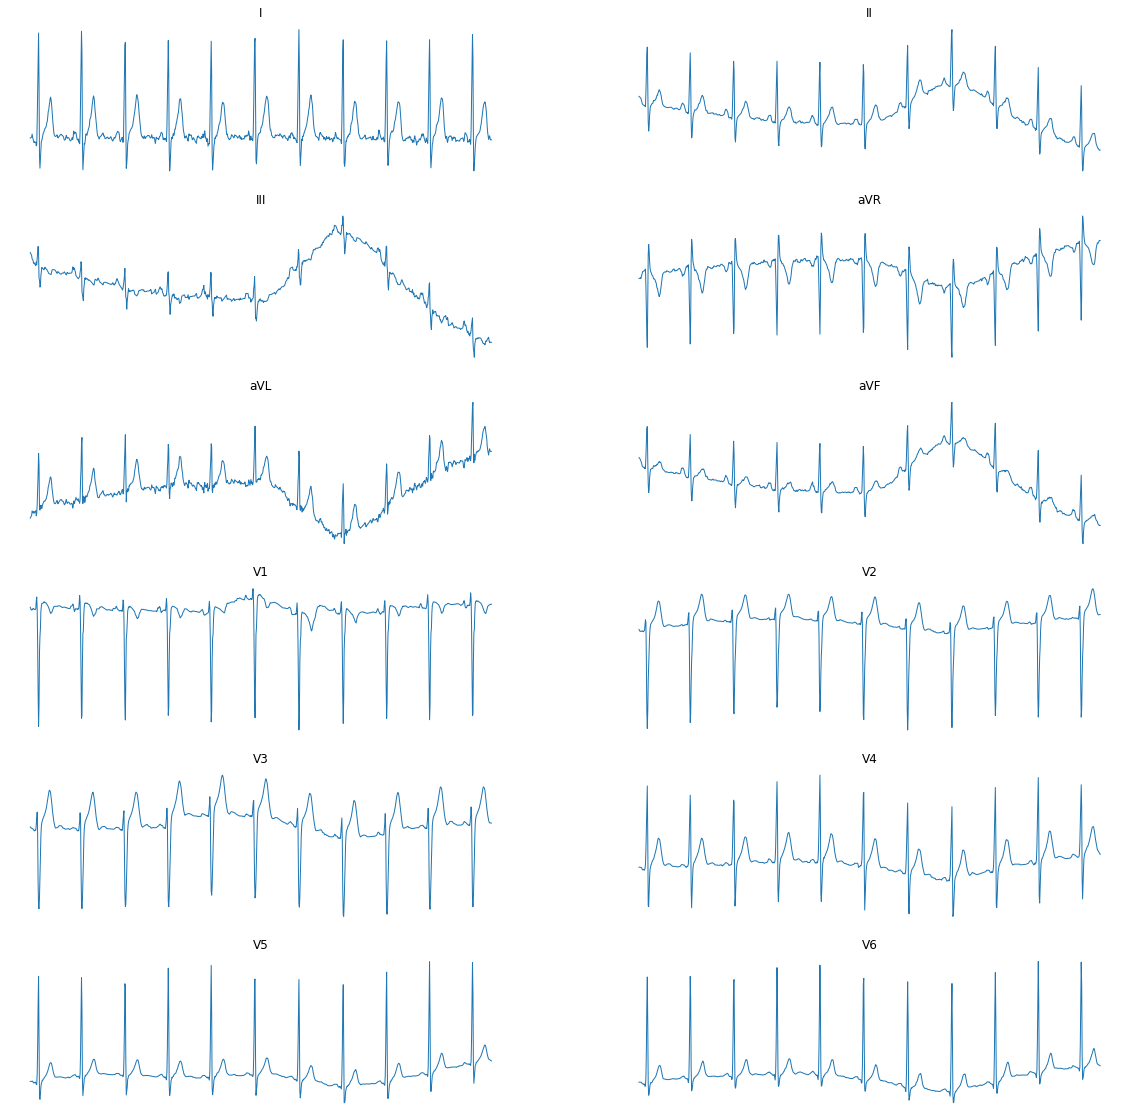

In [44]:
# HYP
ecg = signal_data_raw[20]
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = (0.1,0.1)
plt.figure()
for index in range(12):
    plt.subplot(6,2,index+1)
    plt.plot(ecg[:,index], linewidth=1)
    
    plt.gca()
    plt.title(titles[index])
    plt.axis('off')
plt.show()

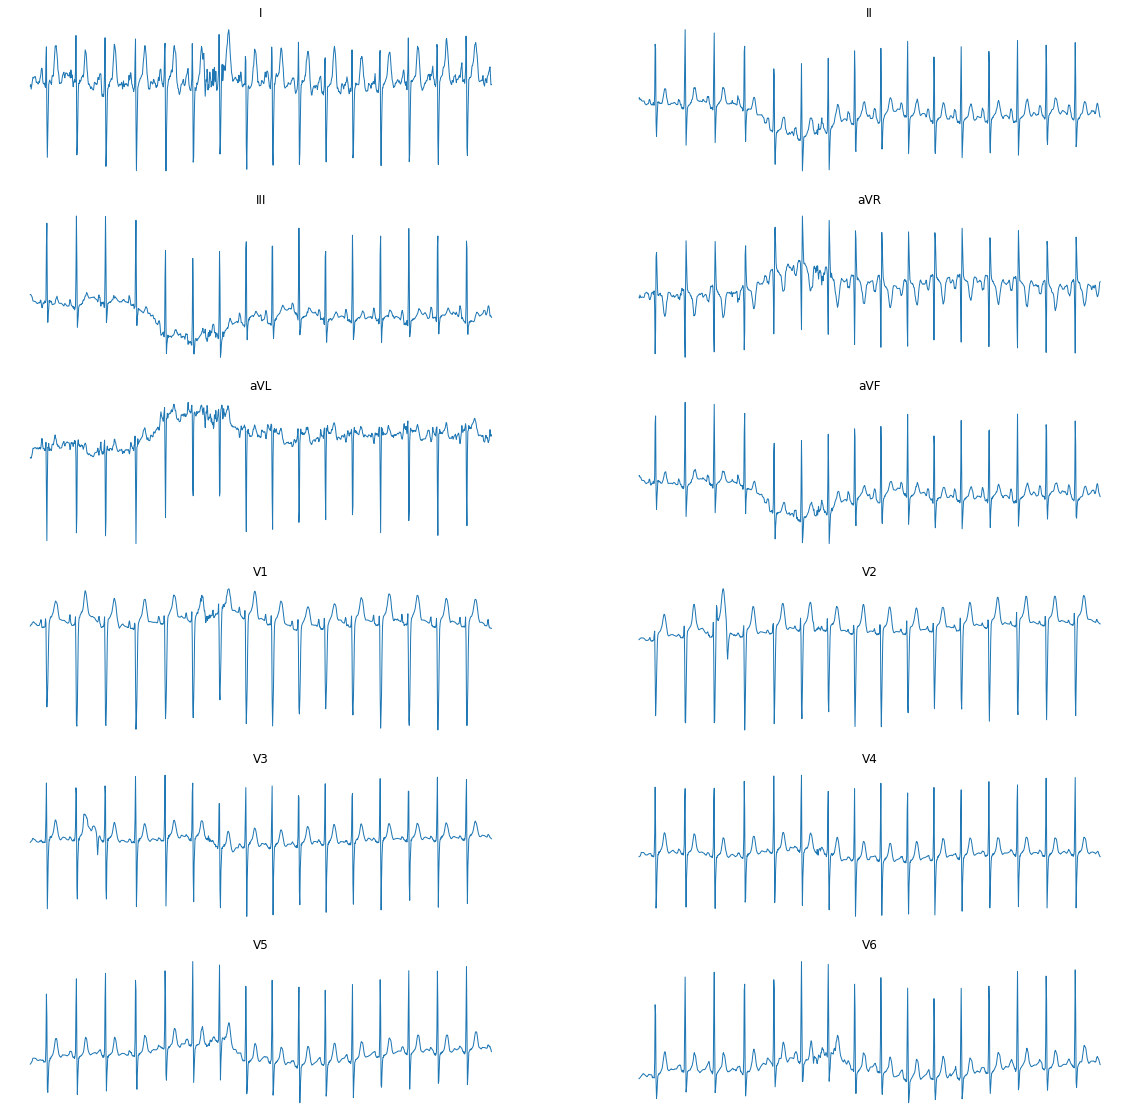

In [45]:
# CD
ecg = signal_data_raw[22]
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = (0.1,0.1)
plt.figure()
for index in range(12):
    plt.subplot(6,2,index+1)
    plt.plot(ecg[:,index], linewidth=1)
    
    plt.gca()
    plt.title(titles[index])
    plt.axis('off')
plt.show()

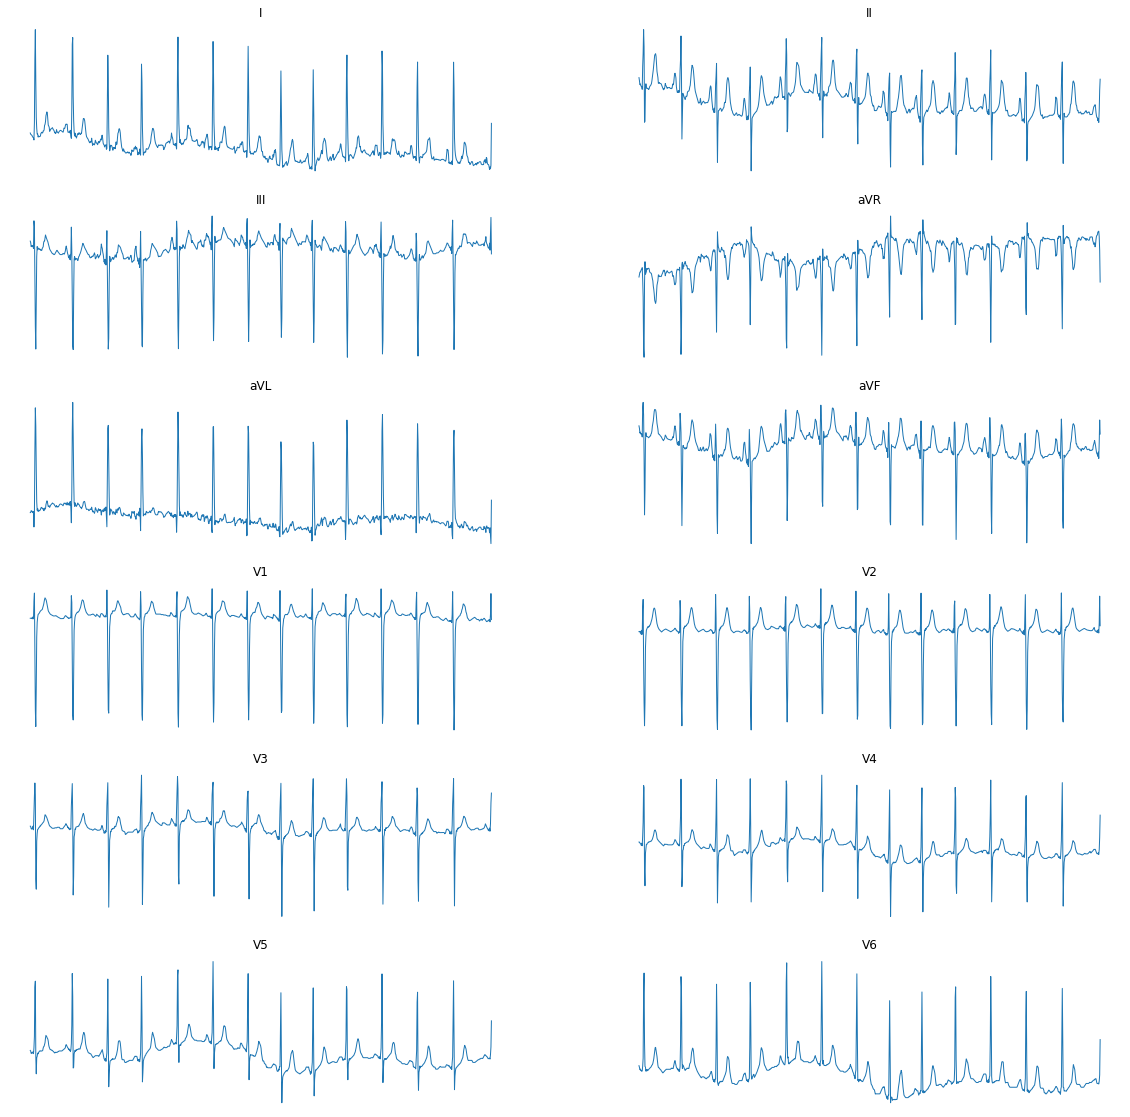

In [46]:
# STTC
ecg = signal_data_raw[14]
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = (0.1,0.1)
plt.figure()
for index in range(12):
    plt.subplot(6,2,index+1)
    plt.plot(ecg[:,index], linewidth=1)
    
    plt.gca()
    plt.title(titles[index])
    plt.axis('off')
plt.show()

In [48]:
buf_arr = np.zeros(shape = (signal_data_raw.shape[0],signal_data_raw.shape[2],signal_data_raw.shape[1]))
for i in range(signal_data_raw.shape[0]):
    buf_arr[i] = signal_data_raw[i].transpose()

In [49]:
signal_data_raw = buf_arr
del buf_arr

In [50]:
signal_data_raw.shape

(17242, 12, 1000)

In [51]:
signal_data = (signal_data_raw - signal_data_raw.mean(axis = 0))/signal_data_raw.std(axis = 0)

In [52]:
del signal_data_raw

In [53]:
y = data.loc[:,['diagnostic_class_filtered', 'diagnostic_subclass_filtered','superclass','subclass', 'binary_class']]

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(signal_data, y, test_size=0.3, random_state=7)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=7) 

In [68]:
X_train.shape, X_test.shape, X_val.shape

((12069, 12, 1000), (2586, 12, 1000), (2587, 12, 1000))

In [69]:
y_train['diagnostic_class_filtered'].value_counts()

NORM    5070
CD      2234
STTC    2153
MI      2042
HYP      570
Name: diagnostic_class_filtered, dtype: int64

In [70]:
y_train['diagnostic_subclass_filtered'].value_counts()

NORM         5070
STTC         1217
AMI          1125
IMI           897
LAFB/LPFB     605
IRBBB         552
LVH           512
CLBBB         364
NST_          346
ISCA          294
CRBBB         268
IVCD          219
ISC_          195
_AVB          146
ISCI          101
WPW            47
LAO/LAE        36
ILBBB          33
RAO/RAE        22
LMI            20
Name: diagnostic_subclass_filtered, dtype: int64

In [71]:
y_train['binary_class'].value_counts()

0    6999
1    5070
Name: binary_class, dtype: int64

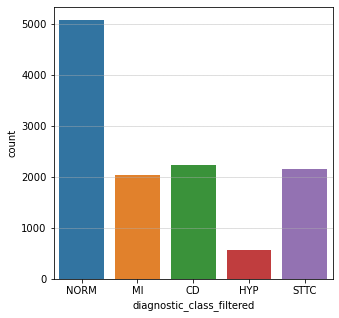

In [72]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sns.countplot(x='diagnostic_class_filtered', data=y_train)
pass

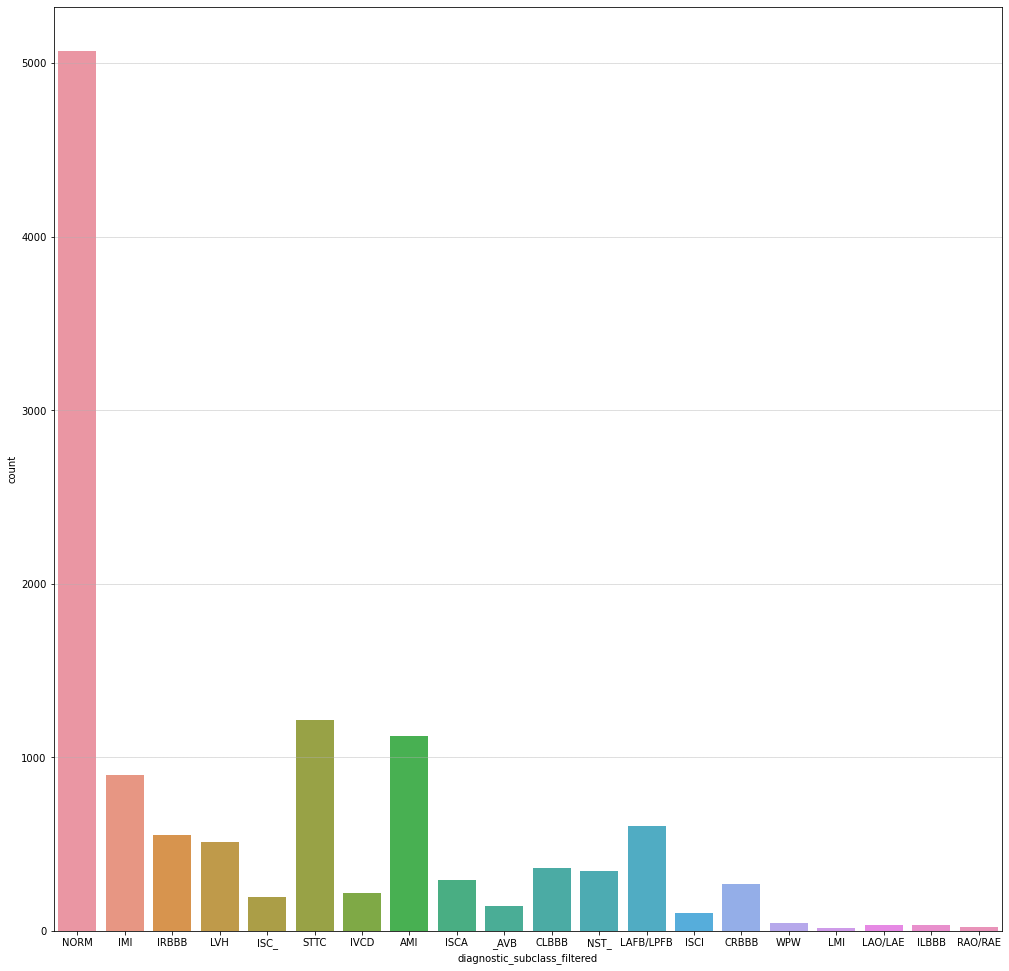

In [74]:
plt.rcParams['figure.figsize'] = (17.0, 17.0)
sns.countplot(x='diagnostic_subclass_filtered', data=y_train)
pass

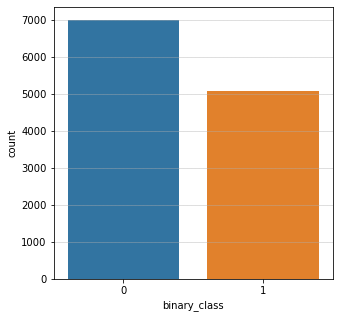

In [75]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sns.countplot(x='binary_class', data=y_train)
pass

In [76]:
y_test['diagnostic_class_filtered'].value_counts()

NORM    1048
CD       494
STTC     478
MI       452
HYP      114
Name: diagnostic_class_filtered, dtype: int64

In [77]:
y_test['diagnostic_subclass_filtered'].value_counts()

NORM         1048
STTC          277
AMI           260
IMI           189
LAFB/LPFB     142
IRBBB         118
LVH           101
CLBBB          74
ISCA           69
NST_           57
CRBBB          53
IVCD           50
ISC_           49
_AVB           39
ISCI           26
WPW            10
ILBBB           8
LAO/LAE         8
RAO/RAE         5
LMI             3
Name: diagnostic_subclass_filtered, dtype: int64

In [78]:
y_test['binary_class'].value_counts()

0    1538
1    1048
Name: binary_class, dtype: int64

In [79]:
np.save('Train\X_train',X_train)
np.save('Train\y_train_superclass',y_train['superclass'])
np.save('Train\y_train_subclass',y_train['subclass'])
np.save('Train\y_train_binary',y_train['binary_class'])

np.save('Valid\X_valid',X_val)
np.save('Valid\y_valid_superclass',y_val['superclass'])
np.save('Valid\y_valid_subclass',y_val['subclass'])
np.save('Valid\y_valid_binary',y_val['binary_class'])

np.save('Test\X_test',X_test)
np.save('Test\y_test_superclass',y_test['superclass'])
np.save('Test\y_test_subclass',y_test['subclass'])
np.save('Test\y_test_binary',y_test['binary_class'])
